# Loss Visualization in TensorFlow


In [51]:
import tensorflow as tf
import numpy

# Import MNIST data
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [52]:
# Use Logistic Regression from our previous example

# Parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784], name='x') # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10], name='y') # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name="weights")
b = tf.Variable(tf.zeros([10]), name="bias")

# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = -tf.reduce_sum(y*tf.log(activation)) # Cross entropy
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # Gradient Descent

# Initializing the variables
init = tf.initialize_all_variables()

In [53]:
# Create a summary to monitor cost function
tf.scalar_summary("loss", cost)

# Merge all summaries to a single operator
merged_summary_op = tf.merge_all_summaries()

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Set logs writer into folder /tmp/tensorflow_logs
    summary_writer = tf.train.SummaryWriter('/tmp/tensorflow_logs', graph_def=sess.graph_def)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
            # Write logs at every iteration
            summary_str = sess.run(merged_summary_op, feed_dict={x: batch_xs, y: batch_ys})
            summary_writer.add_summary(summary_str, epoch*total_batch + i)
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

### Run the command line
```
tensorboard --logdir=/tmp/tensorflow_logs
```

### Open http://localhost:6006/ into your web browser

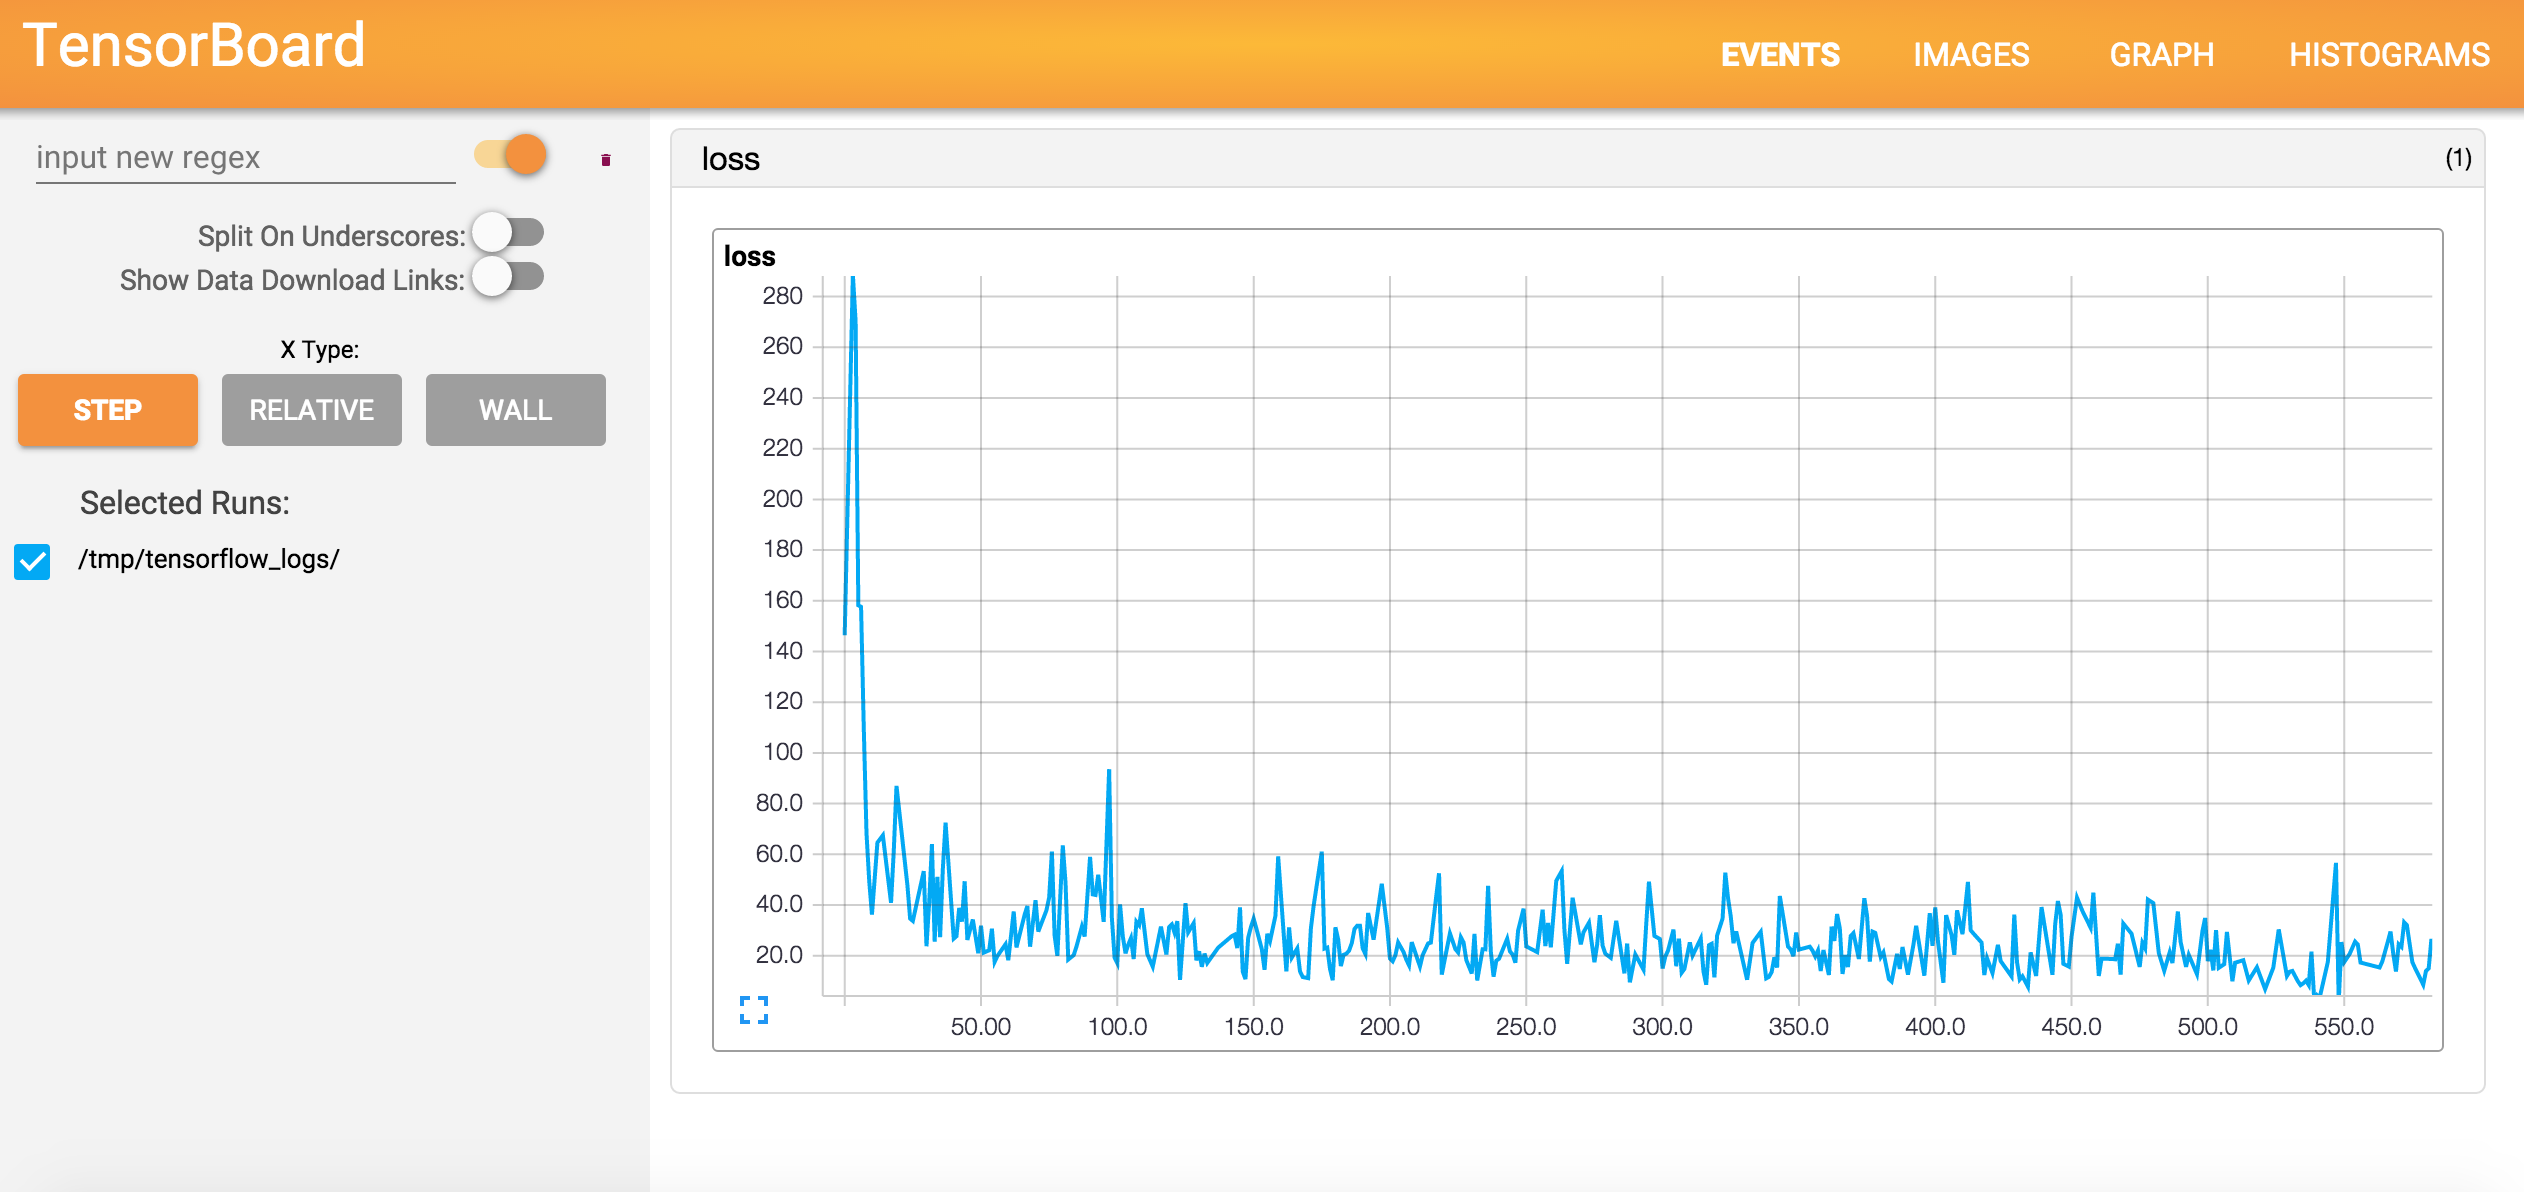

In [57]:
# Loss per minibatch step